### Coding Steps:


In [8]:
#Importing libraries and csv file

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")
pd.options.mode.chained_assignment = None  # default='warn'
import warnings
warnings.filterwarnings('ignore')


In [9]:
#reading csv files given for analyses on this assignment

# loan=pd.read_csv('D:/New folder\Lending_Club _Case\loan.csv',low_memory=False)
loan=pd.read_csv("loan.csv", low_memory=False)

In [10]:
loan.shape

(39717, 111)

In [11]:
loan.sample()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
25273,587552,754873,5000,5000,4831.138851,60 months,17.93%,126.78,E,E5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [12]:
loan.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


### Data Cleaning

### As can be seen we have multiple columns with missing values. Hence analyzing further for missing values

In [13]:
loan[loan.isnull().sum(axis=1)>0]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
#checking for total missing values by expressing in %

#for further analysis checking missing values with >50% 

missing=round(100*(loan.isnull().sum()/len(loan.index)),2)

missing.loc[missing>=50]

mths_since_last_delinq             64.66
mths_since_last_record             92.99
next_pymnt_d                       97.13
mths_since_last_major_derog       100.00
annual_inc_joint                  100.00
dti_joint                         100.00
verification_status_joint         100.00
tot_coll_amt                      100.00
tot_cur_bal                       100.00
open_acc_6m                       100.00
open_il_6m                        100.00
open_il_12m                       100.00
open_il_24m                       100.00
mths_since_rcnt_il                100.00
total_bal_il                      100.00
il_util                           100.00
open_rv_12m                       100.00
open_rv_24m                       100.00
max_bal_bc                        100.00
all_util                          100.00
total_rev_hi_lim                  100.00
inq_fi                            100.00
total_cu_tl                       100.00
inq_last_12m                      100.00
acc_open_past_24

### As can be figured from above analyses we have multiple columns with > 60% missing values. Removing such columns since they does not contribute majorly towards our goal of analysing the dataframe - loan



In [15]:
loan=loan.drop(missing.loc[missing>=50].index,axis=1)

In [16]:
loan.shape

(39717, 54)

### After removing calumns with >50% missing values, number of columns has reduced from 57 to 54

In [17]:
#checking further for more missing values

missing=round(100*(loan.isnull().sum()/len(loan.index)),2)
missing.loc[missing !=0]

emp_title                      6.19
emp_length                     2.71
desc                          32.58
title                          0.03
revol_util                     0.13
last_pymnt_d                   0.18
last_credit_pull_d             0.01
collections_12_mths_ex_med     0.14
chargeoff_within_12_mths       0.14
pub_rec_bankruptcies           1.75
tax_liens                      0.10
dtype: float64

### As can be seen desc column contributes to maximum null values hence analysing the column further 

In [18]:
loan.loc[:,'desc']

0          Borrower added on 12/22/11 > I need to upgra...
1          Borrower added on 12/22/11 > I plan to use t...
2                                                      NaN
3          Borrower added on 12/21/11 > to pay for prop...
4          Borrower added on 12/21/11 > I plan on combi...
                               ...                        
39712    Our current gutter system on our home is old a...
39713    The rate of interest and fees incurred by carr...
39714                                                  NaN
39715                                                  NaN
39716    I plan to consolidate over $7,000 of debt: a c...
Name: desc, Length: 39717, dtype: object

### As can be seen the column is irrelevent for our case study hence removing the column

In [19]:
#removing desc column

loan=loan.drop('desc',axis=1)


In [20]:
#checking loan dataframe number of rows and columns
loan.shape

(39717, 53)

### We have successfully reduced columns to 53 from 54 which was achieved earlier while cleaning the initial columns

In [21]:
#checking further for more missing values

missing=round(100*(loan.isnull().sum()/len(loan.index)),2)
missing.loc[missing !=0]

emp_title                     6.19
emp_length                    2.71
title                         0.03
revol_util                    0.13
last_pymnt_d                  0.18
last_credit_pull_d            0.01
collections_12_mths_ex_med    0.14
chargeoff_within_12_mths      0.14
pub_rec_bankruptcies          1.75
tax_liens                     0.10
dtype: float64

### emp_title and emp_length are the only variable having a significant number of missing values. Let's analyze them further

In [22]:
loan.emp_title.value_counts()

US Army                             134
Bank of America                     109
IBM                                  66
AT&T                                 59
Kaiser Permanente                    56
                                   ... 
Mt. Olive Twp                         1
Appleby Cleaning and Restoration      1
Sparta Social Networks                1
Wheelabrator Technologies Inc.        1
Chester Mental Health Center          1
Name: emp_title, Length: 28820, dtype: int64

In [23]:
loan.emp_length.value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [24]:
#columns emp_title, emp_length have 6.19% and 2.71% missing value. These columns have information about the customer/borrower like their job title and their employment length in years. Let's remove the rows with nan/blank values for these varaibles.

loan=loan[~loan.emp_title.isnull()]
loan=loan[~loan.emp_length.isnull()]


In [25]:
#checking further for more missing values

missing=round(100*(loan.isnull().sum()/len(loan.index)),2)
missing.loc[missing>0]

title                         0.02
revol_util                    0.12
last_pymnt_d                  0.17
collections_12_mths_ex_med    0.13
chargeoff_within_12_mths      0.13
pub_rec_bankruptcies          1.76
tax_liens                     0.09
dtype: float64

In [26]:
loan['pub_rec_bankruptcies'].value_counts()

0.0    35039
1.0     1502
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

### pub_rec_bankruptcies can be seen to have taking values like [0,1,2]. Almost 35000 records with 0 record of bankrupcies, 1500 records having one bankrupcies case and 7 records with two bankrupcies case. Hence, instead of mode representation of the data which is 0 bankrupcies to impute the missing values we will remove the missing values so that there is no bias in the data arises

In [27]:
loan=loan[~loan.pub_rec_bankruptcies.isnull()]

In [28]:
#checking further for more missing values

missing=round(100*(loan.isnull().sum()/len(loan.index)),2)
missing.loc[missing>0]

title                         0.02
revol_util                    0.13
last_pymnt_d                  0.18
collections_12_mths_ex_med    0.01
chargeoff_within_12_mths      0.01
dtype: float64

### Now we are left 5 columns and examining further columns collections_12_mths_ex_med and chargeoff_within_12_mths which are for Number of collections in 12 months excluding medical collections and Number of charge-offs within 12 months respectively.        

In [29]:
(loan['collections_12_mths_ex_med'].unique())

array([ 0., nan])

In [30]:
loan['chargeoff_within_12_mths'].unique()

array([ 0., nan])

### The columns collections_12_mths_ex_med, chargeoff_within_12_mths and tax_liens has either value of 0 or nan(no entry/blank). The range of values that these categorical columns can take is not of any significant impact to the analysis hence dropping the columns.

In [31]:
loan=loan.drop('collections_12_mths_ex_med',axis=1)

In [32]:
loan=loan.drop('chargeoff_within_12_mths',axis=1)

In [33]:
loan.shape

(36548, 51)

In [34]:
#checking further for more missing values

missing=round(100*(loan.isnull().sum()/len(loan.index)),2)
missing.loc[missing>0]

title           0.02
revol_util      0.13
last_pymnt_d    0.18
dtype: float64

### Now, we are left with 3 columns title, revol_util and last_pymnt_d which account for a very small % of missing value of 0.02%, 0.13% and 0.18% respective+6ly.
#### title gives the title of the loan specified by the borrower in the application.
#### revol_util gives the revolving line utelization and
#### last_pymnt_d gives the month in which last payment was received.

### Since the columns have less number of missing and may hold significant position while analysing we thus, drop the missing values only.


In [35]:
loan=loan[~loan.title.isnull()]
loan=loan[~loan.revol_util.isnull()]
loan=loan[~loan.last_pymnt_d.isnull()]

In [36]:
loan.shape

(36433, 51)

In [37]:
loan.isnull().sum()

id                         0
member_id                  0
loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_title                  0
emp_length                 0
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
pymnt_plan                 0
url                        0
purpose                    0
title                      0
zip_code                   0
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                 0
total_acc                  0
initial_list_status        0
out_prncp                  0
out_prncp_inv 

In [38]:
# checking fraction of oservations lost in loan dataframe

round(100*(len(loan.index)/39717),2)

91.73

#### As can be seen from above calculation we have lost  ~8% observations in cleaning the missing values.


### Analyzing data 

In [39]:
#creating a new dataframe with mo missing values to simplify the analysis 

no_missing=loan[:]

In [40]:
#Further narrowing down on the columns and dropping all unnecessary variables

no_missing.nunique().sort_values()

tax_liens                      1
delinq_amnt                    1
acc_now_delinq                 1
application_type               1
policy_code                    1
pymnt_plan                     1
initial_list_status            1
term                           2
loan_status                    3
verification_status            3
pub_rec_bankruptcies           3
home_ownership                 4
pub_rec                        5
grade                          7
inq_last_6mths                 9
emp_length                    11
delinq_2yrs                   11
purpose                       14
sub_grade                     35
open_acc                      38
addr_state                    49
issue_d                       52
total_acc                     79
last_credit_pull_d            96
last_pymnt_d                  97
int_rate                     334
earliest_cr_line             510
zip_code                     806
loan_amnt                    863
funded_amnt                 1024
out_prncp 

### There are few columns having a single unique value or all unique values (36433). These may have nothing much to contribute to the analysis i.e. columns which are far from being the driving columns towards loan default as per observations made from loan and dictionary files shared with us. Some other columns are redundant like:

1. __id__
:<br>is a random number given to the loan, does not contribute to analysis
2. __member_id__
:<br>is a random number given to the member, does not contribute to analysis
3. __pymnt_plan__
:<br> value for entire dataset is 'n', therefore can be removed.
4. __url__
:<br>is a URL for LC page for corresponding to each member_id which can be removed
5. __zip_code__
:<br>first 3 digits of the 5 digit zip code are visible, also is redundant with addr_state, does not contribute to analysis
6. __initial_list_status__
:<br> value for entire dataset is 'f' out of the possible values, therefore can be removed.
7. __policy_code__
:<br> value for entire dataset is '1', indicating all are publicly available, therefore nothing to contribute for analysis, to be removed.
8. __application_type__
:<br>value for entire dataset is 'INDIVIDUAL', indicating all are individual applications not joint, therefore nothing to contribute for analysis, to be removed.
9. __acc_now_delinq__
:<br>value for entire dataset is '0', therefore can be removed.
10. __delinq_amnt__
:<br>value for entire dataset is '0', therefore can be removed.
11. __funded_amnt_inv__
:<br> value for this column is almost equivalent to funded_amnt. removing to avoid multi colinearity. Also this wont be available at the time of decision making of funding a loan.
12. __pub_rec__
:<br> Number of derogatory public records is almost equivalent to pub_rec_bankruptcies, removing to avoid multi colinearity


In [41]:
no_missing_drop=['id','member_id','funded_amnt_inv','pub_rec','pymnt_plan','url','zip_code','initial_list_status','policy_code','application_type','acc_now_delinq','delinq_amnt',]
no_missing=no_missing.drop(no_missing_drop,axis=1)
no_missing.shape

(36433, 39)

### Columns reduced to 39 from 51 after removing columns in dataframe no_missing_drop

In [42]:
#creating new csv files to understand the columns clearly and use the same file for further analysis

no_missing.to_csv('master_loan.csv', encoding='utf-8', index=False)
master_loan=no_missing[:]

In [43]:
master_loan.sample()

,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,tax_liens
3794,14000,14000,60 months,20.30%,373.26,E,E5,Miami Dade Transit,7 years,MORTGAGE,...,11865.29,8248.63,0.0,0.0,0.0,May-16,373.26,May-16,0.0,0.0


### There are few columns expressed in % like int_rate and revol_util. These has values like '15.27%' and '9.40%'. Analyzing the columns further

#### int_rate: Interest Rate on the loan
#### revol_util: Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.

In [44]:
master_loan.int_rate.describe()

count      36433
unique       334
top       10.99%
freq         901
Name: int_rate, dtype: object

In [45]:
master_loan.revol_util.describe()

count     36433
unique     1082
top          0%
freq        852
Name: revol_util, dtype: object

### As can be seen these columns has dtype as 'object'. Converting these columns to have just the value without '%' and typecast it to float.

In [46]:
master_loan.int_rate=master_loan.int_rate.apply(lambda x:float(x.strip('%')))

In [47]:
master_loan.int_rate

1        15.27
3        13.49
4        12.69
5         7.90
6        15.96
         ...  
39551    10.91
39562    10.28
39623    12.49
39666    11.22
39680    11.86
Name: int_rate, Length: 36433, dtype: float64

In [48]:
master_loan.revol_util=master_loan.revol_util.apply(lambda x:float(x.strip('%')))

In [49]:
master_loan.revol_util

1         9.4
3        21.0
4        53.9
5        28.3
6        85.6
         ... 
39551    96.5
39562    68.7
39623    62.9
39666    34.3
39680    70.9
Name: revol_util, Length: 36433, dtype: float64

### While analyzing the master_loan further it is observed that emp_length column contains < symbol aswell 'years' written along with numeric characters hence updating the rows with just value integers

In [50]:
master_loan.emp_length.value_counts()

10+ years    8407
2 years      4178
< 1 year     4052
3 years      3914
4 years      3297
5 years      3129
1 year       3026
6 years      2121
7 years      1697
8 years      1405
9 years      1207
Name: emp_length, dtype: int64

In [51]:
master_loan=master_loan.replace({"emp_length":{'10+ years':10,'2 years':2,'< 1 year':0,'3 years':3,'4 years':4,'5 years':5,'1 year':1,'6 years':6,'7 years':7,'8 years':8,'9 years':9}})

In [52]:
master_loan.emp_length.value_counts()

10    8407
2     4178
0     4052
3     3914
4     3297
5     3129
1     3026
6     2121
7     1697
8     1405
9     1207
Name: emp_length, dtype: int64

### Successfully cleaned the column and just left the alue integers. Now analyzing the master_loan dataframe for further cleaning

In [53]:
master_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36433 entries, 1 to 39680
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                36433 non-null  int64  
 1   funded_amnt              36433 non-null  int64  
 2   term                     36433 non-null  object 
 3   int_rate                 36433 non-null  float64
 4   installment              36433 non-null  float64
 5   grade                    36433 non-null  object 
 6   sub_grade                36433 non-null  object 
 7   emp_title                36433 non-null  object 
 8   emp_length               36433 non-null  int64  
 9   home_ownership           36433 non-null  object 
 10  annual_inc               36433 non-null  float64
 11  verification_status      36433 non-null  object 
 12  issue_d                  36433 non-null  object 
 13  loan_status              36433 non-null  object 
 14  purpose               

In [54]:
master_loan.term.value_counts()

 36 months    26377
 60 months    10056
Name: term, dtype: int64

#### As can be seen that the column 'term' contains string 'months' along with values 36 and 60 which is to describe the number of payments on the loan. Hence, removing the months string and just keeping the values 36 and 60.

In [55]:
#Splitting value elements and re-writing the master_loan dataframe with edited 'term' column containing only the values 36 and 60

master_loan['term']=master_loan.term.apply(lambda x:int(x.split()[0]))

In [56]:
master_loan.term.describe()

count    36433.000000
mean        42.624324
std         10.728712
min         36.000000
25%         36.000000
50%         36.000000
75%         60.000000
max         60.000000
Name: term, dtype: float64

#### As can be seen we have successfully removed 'months' from column 'term' and kept just the values. Now analyzing further the master_loan dataframe

### On analyzing the master_loan dataframe we can see that earliest_cr_line which describes : The month the borrower's earliest reported credit line was opened has values in month as well years for ex. Apr-99, hence we will  seperate month and year with in a new column named as earliest_cr_line_month and earliest_cr_line_year


In [57]:
#converting dtype of 'earliest_cr_line' to datetime since it's dtype is object  

master_loan['earliest_cr_line']=pd.to_datetime(master_loan['earliest_cr_line'],format = '%b-%y')

# Splitting the month and year int 2 new columns earliest_cr_line_month and earliest_cr_line_year

master_loan['earliest_cr_line_month'] = master_loan['earliest_cr_line'].dt.month
master_loan['earliest_cr_line_year'] = master_loan['earliest_cr_line'].dt.year

In [58]:

master_loan['earliest_cr_line_month'].value_counts()

10    3765
12    3731
11    3629
9     3272
1     3177
8     3047
7     2820
6     2678
5     2646
2     2617
3     2528
4     2523
Name: earliest_cr_line_month, dtype: int64

In [59]:
master_loan['earliest_cr_line_year'].value_counts()

2000    3034
1999    2763
1998    2645
2001    2363
1997    2271
1996    2074
1995    1974
1994    1860
2002    1794
2003    1740
2004    1639
2005    1406
1993    1398
2006    1079
1992     970
1990     944
1991     884
1989     781
1988     671
2007     668
1987     565
1986     447
1985     406
1984     360
1983     296
1982     196
1981     154
1980     150
2008     144
1979     141
1978     130
1977      90
1976      73
1975      57
1974      51
1973      41
1970      35
1971      34
1972      33
1969      22
2068      12
2067      12
2066       7
2065       6
2063       4
2062       3
2064       2
2046       1
2056       1
2054       1
2050       1
Name: earliest_cr_line_year, dtype: int64

### On further checking it is observed that there are few records which are beyond year 2011 and as per problem statement and document provided 2011 is the max range of year for which the data is available with us. Hence reducing the years >2011 from -100 years 

In [60]:
#re-writing earliest_cr_line_year with years <2012 as per the max range loan csv file contains

master_loan.loc[master_loan['earliest_cr_line_year']>2011,'earliest_cr_line_year']=master_loan['earliest_cr_line_year']-100

In [61]:
master_loan['earliest_cr_line_year'].value_counts()

2000    3034
1999    2763
1998    2645
2001    2363
1997    2271
1996    2074
1995    1974
1994    1860
2002    1794
2003    1740
2004    1639
2005    1406
1993    1398
2006    1079
1992     970
1990     944
1991     884
1989     781
1988     671
2007     668
1987     565
1986     447
1985     406
1984     360
1983     296
1982     196
1981     154
1980     150
2008     144
1979     141
1978     130
1977      90
1976      73
1975      57
1974      51
1973      41
1970      35
1971      34
1972      33
1969      22
1967      12
1968      12
1966       7
1965       6
1963       4
1962       3
1964       2
1956       1
1954       1
1950       1
1946       1
Name: earliest_cr_line_year, dtype: int64

#### We have successfully modified the years more than 2011 with -100 

### There are certain columns which need rounding the values to two decimal places for analyzing further since they are important for analyzing further . These columns are:

#### total_pymnt: Payments received to date for total amount funded
#### total_rec_late_fee: Late fees received to date
#### collection_recovery_fee: post charge off collection fee


In [62]:
#rounding the decimal upto to 2 places using round function

master_loan['total_pymnt']=round(master_loan['total_pymnt'],2)
master_loan['total_rec_late_fee']=round(master_loan.total_rec_late_fee,2)
master_loan.collection_recovery_fee=round(master_loan.collection_recovery_fee,2)
master_loan.annual_inc=round(master_loan.annual_inc,2)

In [63]:
master_loan['total_pymnt'].tail()

39551    14370.92
39562     5134.09
39623     4015.96
39666    11652.75
39680     3579.66
Name: total_pymnt, dtype: float64

#### We have successfully rounded the values upto 2 decimals of each above mentioned columns

In [64]:
# Since we have mostly cleaned the data now writing the file to .csv format to further visualise the data for any more improvements.

master_loan.to_csv('master_loan.csv', encoding='utf-8', index=False)


### On analyzing the master_loan dataframe we can see that 2 columns issue_d (which describes : The month which the loan was funded) and  has values in month as well years for ex. Dec-11, hence we will  seperate month and year with in a new column named as issue_d_month and issue_d_year

In [65]:
master_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36433 entries, 1 to 39680
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   loan_amnt                36433 non-null  int64         
 1   funded_amnt              36433 non-null  int64         
 2   term                     36433 non-null  int64         
 3   int_rate                 36433 non-null  float64       
 4   installment              36433 non-null  float64       
 5   grade                    36433 non-null  object        
 6   sub_grade                36433 non-null  object        
 7   emp_title                36433 non-null  object        
 8   emp_length               36433 non-null  int64         
 9   home_ownership           36433 non-null  object        
 10  annual_inc               36433 non-null  float64       
 11  verification_status      36433 non-null  object        
 12  issue_d                  36433 n

In [66]:
#converting dtype of 'issue_d' to datetime since it's dtype is object  

master_loan['issue_d']=pd.to_datetime(master_loan['issue_d'],format = '%b-%y')

# Splitting the month and year int 2 new columns earliest_cr_line_month and earliest_cr_line_year

master_loan['issue_d_month'] = master_loan['issue_d'].dt.month
master_loan['issue_d_year'] = master_loan['issue_d'].dt.year

In [67]:
# It is also observed that last_credit_pull_d column is not in proper format and its in object format so converting it into datetime dtype

master_loan.last_credit_pull_d =pd.to_datetime(master_loan['last_credit_pull_d'],format = '%b-%y') #master_loan.last_credit_pull_d.apply(lambda x: datetime.strptime(x, '%b-%y'))
master_loan["last_credit_pull_d_year"] = master_loan.last_credit_pull_d.apply(lambda x: x.year)
master_loan["last_credit_pull_d_month"] = master_loan.last_credit_pull_d.apply(lambda x: x.month)

In [68]:
master_loan[['issue_d_month','issue_d_year','last_credit_pull_d_month','last_credit_pull_d_year']]

,issue_d_month,issue_d_year,last_credit_pull_d_month,last_credit_pull_d_year
1,12,2011,9,2013
3,12,2011,4,2016
4,12,2011,5,2016
5,12,2011,1,2016
6,12,2011,5,2016
...,...,...,...,...
39551,12,2007,5,2014
39562,11,2007,8,2008
39623,10,2007,5,2016
39666,8,2007,3,2010


In [69]:
master_loan.shape

(36433, 45)

# Univariate Analysis


In [70]:
# Lets take a look on important variable loan_status in total loans issued

(master_loan.loan_status.value_counts()*100)/len(master_loan.index)


Fully Paid     83.506711
Charged Off    13.567370
Current         2.925919
Name: loan_status, dtype: float64

### Observations:
#### 83.96 percent loans were fully paid.
#### Close to 14% loans were charged off

In [71]:
# Lets take a look on other important variable purpose of loan in total loans issued


(master_loan.purpose.value_counts()*100)/len(master_loan.index)

debt_consolidation    47.951033
credit_card           12.971756
other                  9.812533
home_improvement       7.424588
major_purchase         5.511487
car                    3.960695
small_business         3.881097
wedding                2.431861
medical                1.740181
moving                 1.451980
house                  0.941454
vacation               0.922241
educational            0.757555
renewable_energy       0.241539
Name: purpose, dtype: float64

### Observations
* ##### Most of the loans taken for debt consolidation(47%) and Credit card bill payment
* ##### Other is also one of the main area where loans were taken.

### Since we need to understand differences in the features between loans that have been fully paid or charged off. Let's not consider loans that are current. So we only keep the loans with status "Fully Paid" or "Charged Off."

In [72]:
#master_loan = master_loan.loc[~(master_loan["loan_status"] == "Current")]
master_loan = master_loan[master_loan['loan_status'].isin(['Fully Paid','Charged Off'])]
master_loan.shape

(35367, 45)

In [73]:
master_loan.loan_status.value_counts()

Fully Paid     30424
Charged Off     4943
Name: loan_status, dtype: int64

In [74]:
#Converting current Charged Off loan status to percent 

"%.2f" % (master_loan.loc[master_loan['loan_status'] == 'Charged Off'].loan_status.count() * 100/len(master_loan.index))

'13.98'

* #### As can be seen that approximately **14%** of loans in the dataset are Charged Off


### Bivariate Analysis

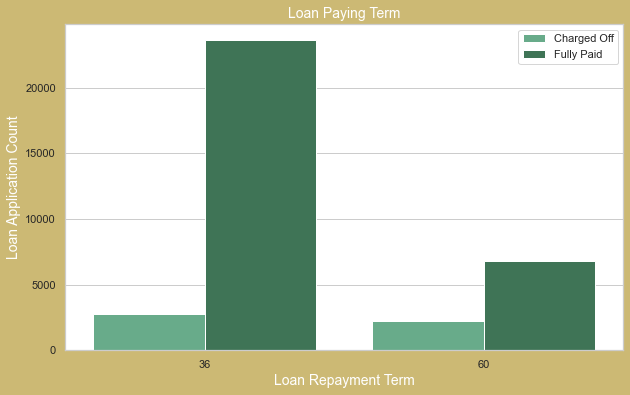

In [75]:
# Univariate Analysis on ordered categorical variable term

plt.figure(figsize=(10,6),facecolor='y')
ax = sns.countplot(x="term",data=master_loan,hue='loan_status',palette='BuGn_d')
ax.set_title('Loan Paying Term',fontsize=14,color='w')
ax.set_xlabel('Loan Repayment Term',fontsize=14,color = 'w')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'w')      
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

#### As can be seen on the plot we can confirm that charged off applicants are more who had taken loan for 36 months as compared to 60 months.

### To understand other important variables let's see their graphs and share observations accordingly when anazlyzed with loan_status column keeping Charged Off as default category

In [76]:
# defining functions to show labels in bar plots (help taken from website)

def showLabels(ax, d=None):
    plt.margins(0.2, 0.2)
    rects = ax.patches
    i = 0
    locs, labels = plt.xticks() 
    counts = {}
    if not d is None:
        for key, value in d.items():
            counts[str(key)] = value

    # For each bar: Place a label
    for rect in rects:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = 5
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        if d is None:
            label = "{:.1f}%".format(y_value)
        else:
            try:
                label = "{:.1f}%".format(y_value) + "\nof " + str(counts[str(labels[i].get_text())])
            except:
                label = "{:.1f}%".format(y_value)
        
        i = i+1

        # Create annotation
        plt.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.

In [77]:
# This method plots a distribution of target column, and its boxplot against loan_status column
def plot_distribution(dataframe, col):
    plt.figure(figsize=(15,5))
    plt.subplot(1, 2, 1)
    ax = sns.histplot(dataframe[col])
    plt.subplot(1, 2, 2)
    sns.boxplot(x=dataframe[col], y=dataframe['loan_status'], data=dataframe)
    plt.show()

In [78]:
# This function plots a given column buckets against loan_status (default = 'Charged Off')
# The plots are in percentages 
# We want to see what are the chances of some category leading to loan default

def plotLoanStatus(dataframe, by, loanstatus='Charged Off'):
    grp = dataframe.groupby(['loan_status',by])[by].count()
    cnt = dataframe.groupby(by)[by].count()
    percentages = grp.unstack() * 100 / cnt.T
    ax = percentages.loc[loanstatus].plot.bar(color=sns.color_palette('husl', 16))
    ax.set_ylabel('% of loans ' + loanstatus)
    showLabels(ax, grp[loanstatus].to_dict())
    plt.margins(0.2, 0.2)
    plt.tight_layout()
    return ax

In [79]:
# This method prints two plots side by side 
# Left one is percentage of a categorical variable in the entire dataset 
# Right one is percentage for Charged Off loans 
# Significant changes in percentage from left to right can indicate a value of interest
def plot_percentages(dataframe, by, sortbyindex=False):
    plt.subplot(1, 2, 1)
    values = (master_loan[by].value_counts(normalize=True)*100)
    if sortbyindex:
        values = values.sort_index()
    ax = values.plot.bar(color=sns.color_palette('husl', 16))
    ax.set_ylabel('% in dataset', fontsize=16)
    ax.set_xlabel(by, fontsize=12)
    showLabels(ax)
    plt.subplot(1, 2, 2)
    #ax = master_loan.groupby('loan_status')['term'].value_counts(normalize=True).loc[:'Charged Off'].plot.bar(color=sns.color_palette('husl', 16))
    values = (master_loan.loc[master_loan['loan_status']=='Charged Off'][by].value_counts(normalize=True)*100)
    if sortbyindex:
        values = values.sort_index()
    ax = values.plot.bar(color=sns.color_palette('husl', 16))
    ax.set_ylabel('% in Charged Off loans', fontsize=16)
    
    showLabels(ax)

### Variable: loan_amnt</br>
####  Data_Dictionary: The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


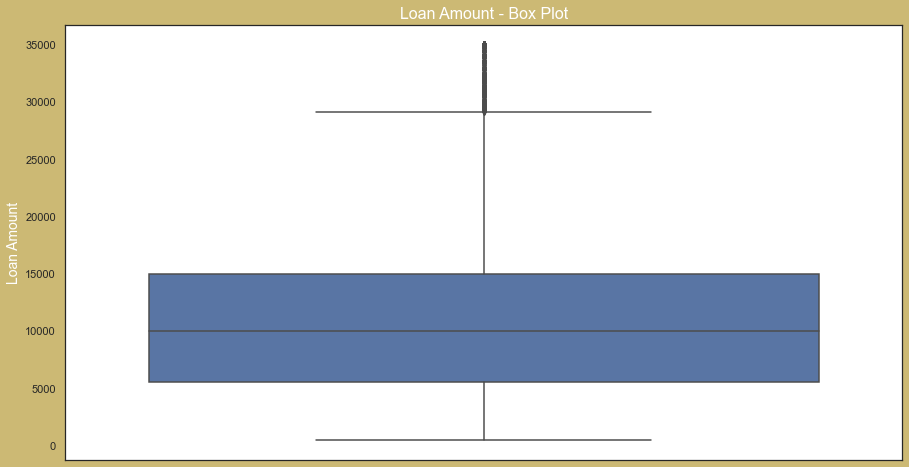

In [80]:
plt.figure(figsize=(15,8),facecolor='y')
sns.set_style("white")
ax = sns.boxplot(y=loan['loan_amnt'])
ax.set_title('Loan Amount - Box Plot',fontsize=16,color='w')
ax.set_ylabel('Loan Amount',fontsize=14,color='w')
plt.show()


#### **Observation:**
##### Above plot shows that most of the Loan amounts are in range of 5000 - 15000

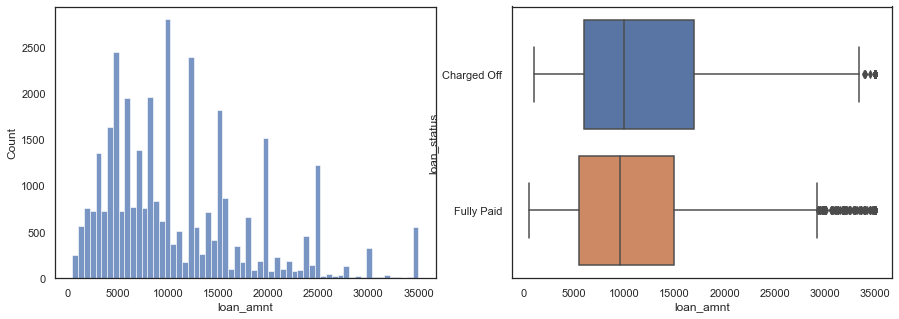

In [81]:
#Understanding loan_amnt distribution plot and it's relation with loan_status column

plot_distribution(master_loan, 'loan_amnt')

In [82]:
master_loan.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4943.0,12286.147077,8064.255961,1000.0,6000.0,10000.0,17000.0,35000.0
Fully Paid,30424.0,10945.731166,7181.867451,500.0,5500.0,9600.0,15000.0,35000.0


#### **Observation:**
* ##### Most of the loans granted are below 15000 (75 percentile value)
* ##### Funding amounts see a spike after each 5000 boundary. <mark>We will use 5000 as bucket size for later analysis.</mark>
* ##### Charged off loans are shifted towards higher average loan amount request.

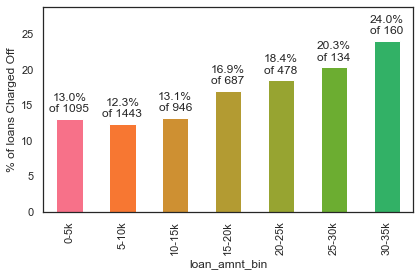

In [83]:
#Creating Derived categorical variable loan_amnt_bin basis the above analysis where funding amounts see a spike after each 5000 boundary thus, we will use 5000 as bucket size for later analysis.
master_loan['loan_amnt_bin']=pd.cut(master_loan['loan_amnt'],[x for x in range(0, 36000, 5000)], labels=[str(x)+'-'+str(x+5)+'k' for x in range (0, 35, 5)])

#plotting column loan_amnt_bin against column loan_status (default = 'Charged Off') to check relation between the 2 columns
plotLoanStatus(master_loan, 'loan_amnt_bin')

#### **Observation:**
#####  The % of charged off loans increases substantially as we go up the loan amount bin. Most loans are below 20000 amount. We can conclude that higher loans can carry higher risk of defaulting. 

### Variable: purpose
#### Data_Dictionary: A category provided by the borrower for the loan request.

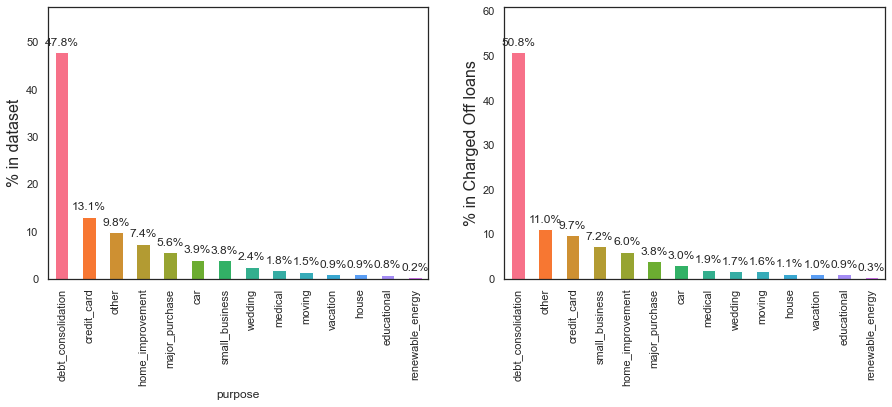

In [84]:
plt.figure(figsize=(15,5))
sns.set_style("white")
plot_percentages(master_loan, 'purpose')

#### **Observation:**
##### <mark>The category 'small_business' percentage **doubles from 3.8 to 7.2** for Charged Off loans.</mark>
### To understand the above variance in small_business let's see how the categories of purpose variable behaves. 

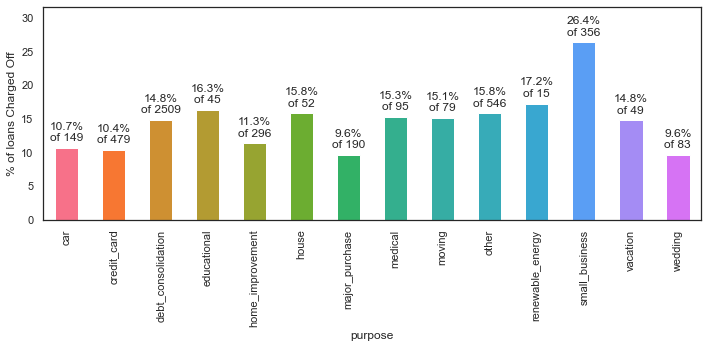

In [85]:
#plotting column puprpose against column loan_status (default = 'Charged Off') to check relation between the 2 columns

plt.figure(figsize=(10, 5))
plotLoanStatus(master_loan, 'purpose')

#### **Observation:**
##### <mark>26% of loans for small business are Charged Off. Making them the riskiest purpose.</mark> 

### Variable: total_pymnt
#### Data dictionary: Payments received to date for total amount funded

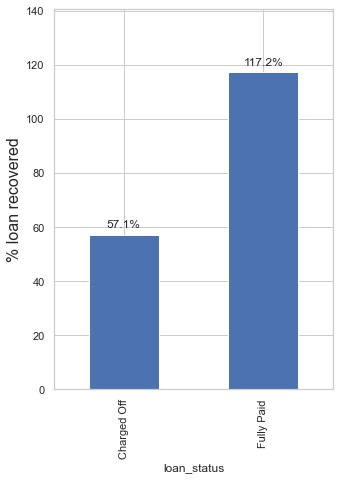

In [86]:
#checking the percent of loans recovered vs loan_status

plt.figure(figsize=(5,7))
sns.set_style("whitegrid")
ax = (master_loan.groupby('loan_status').total_pymnt.sum() * 100 / master_loan.groupby('loan_status').loan_amnt.sum()).plot.bar()
ax.set_ylabel('% loan recovered', fontsize=16)
plt.margins(0.2, 0.2)
showLabels(ax)

#### **Observation:**
##### <mark>Lending club only recovers 57% of the loan amount when loans are Charged Off.</mark> On fully paid up loans, the company makes 17% profit.

### Variable: annual_inc vs loan_amnt

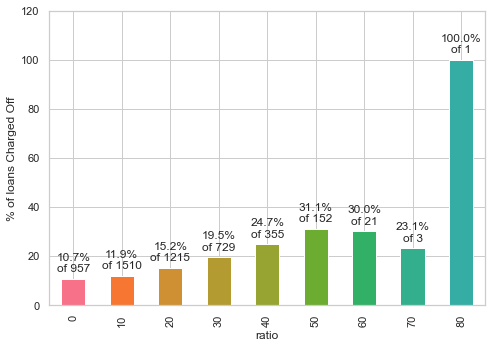

In [87]:
#Deriving new column 'ratio' from 2 variables loan_amnt and annual_inc and plotting column ratio against column loan_status (default = 'Charged Off')

master_loan['ratio'] = master_loan['loan_amnt'] * 10 / master_loan['annual_inc']
master_loan['ratio'] = (master_loan['ratio'].astype(int)) * 10
plt.figure(figsize=(7,5))
sns.set_style("whitegrid")
plotLoanStatus(master_loan, 'ratio')


#### **Observation:**
* ##### If loan amount is less than 20% of annual income, defaults are low. 
* ##### <mark>Loan amounts of 30% of annual income or higher see a high rate of default.</mark>

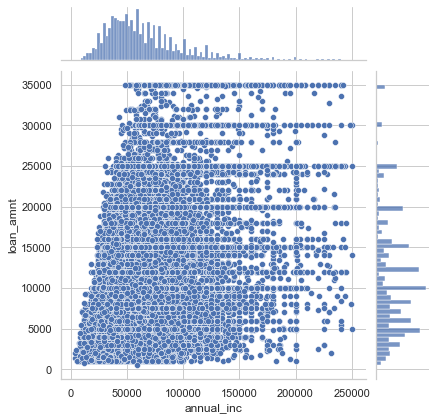

In [88]:
#Creating joint plot to see the spread and analyze the ratio further

sns.jointplot('annual_inc', 'loan_amnt', master_loan.loc[master_loan['annual_inc']<250000])
sns.set_style("whitegrid")
plt.show()

#### **Observation:**
* ##### There are people with average income lower than 50000 taking loans of 25000 or higher. These would be risky loans. 

### Variable: grade
#### Data_Dictionary: LC assigned loan grade


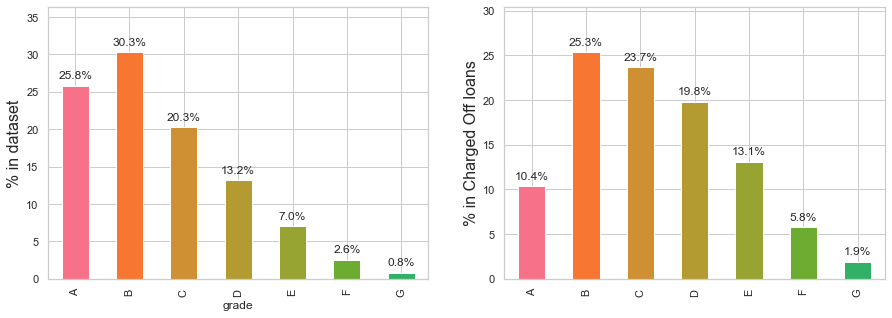

In [89]:
#plotting percentages the column grade along with loan_status column

plt.figure(figsize=(15,5))
plot_percentages(master_loan, 'grade', True)

#### Observation:

* ##### Grade A and B loans are safe. The percentages of grades A and B in Charged Off loans are comparatively to rest of the grades. Providing loan to grade A and B will be more feasible for the LC.

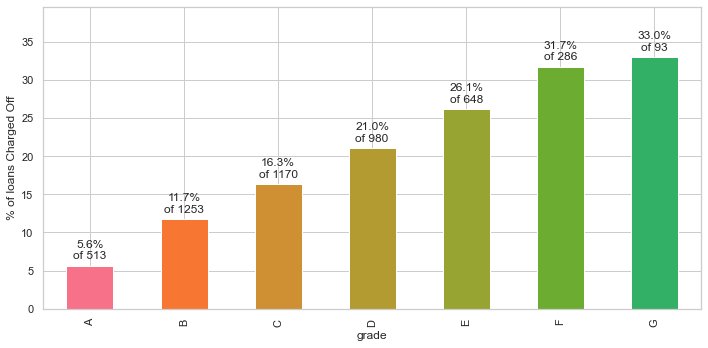

In [90]:
#plotting column grade against column loan_status (default = 'Charged Off') to check relation between the 2 columns

plt.figure(figsize=(10,5))
plotLoanStatus(master_loan, 'grade')


#### **Observation:**

* ##### Nearly 30% of all loans in Grades F and G see a default.

### Basis the above analysis we see that lower grades (C-G) results more in Charged Off loans or in defaulting loan hence now trying to understand the int_rate charged from such grades if it is higher or lower which can eventually play an important role in LC profit or loss

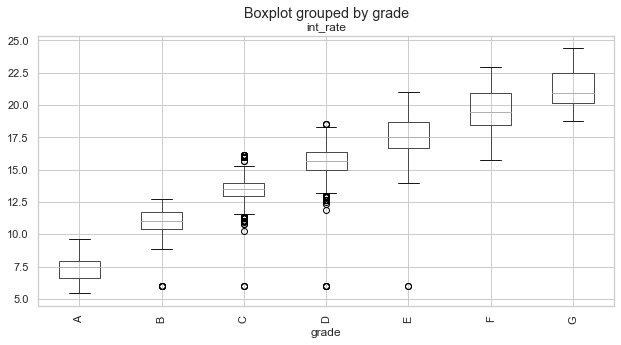

In [91]:
#Plotting columns int_rate and grade on a boxplot

fig, ax = plt.subplots(figsize=(10,5))
master_loan.boxplot(column=['int_rate'],by='grade', ax=ax, rot=90)

#### **Observation:**
* ##### Here we see that Lending Club is charging higher interest rates for lower grade loans which contributes more to loan defaulting. Thus, the interest rate charged by LC is correct. 

### Variable - int_rate
#### Data_Dictionary: Interest Rate on the loan.

<Figure size 720x360 with 0 Axes>

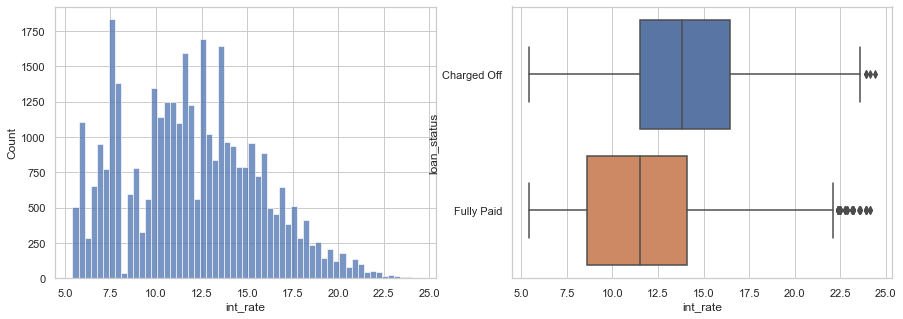

In [92]:
#plotting distribution of int_rate column and its boxplot against loan_status column

plt.figure(figsize=(10,5))

plot_distribution(master_loan, 'int_rate')

In [93]:
master_loan.groupby('loan_status')['int_rate'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4943.0,13.929828,3.647619,5.42,11.49,13.79,16.45,24.40
Fully Paid,30424.0,11.667243,3.613734,5.42,8.59,11.49,14.09,24.11


#### **Observation:**
* ##### As can be seen from above analysis the intrest rate varies from 5.42% to 24.4% and the intrest rate for Charged Off loans appears to be higher than for Fully Paid as the risk increases the rate of interest imposed on the loan also increases. 

### Analyzing the int_rate against Charged Off category of loan_status variable 

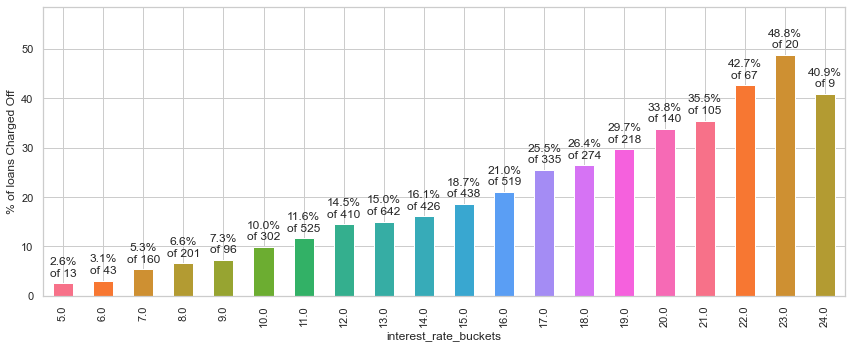

In [94]:
#derving new variable interest_rate_buckets from int_rate for analyzing further

master_loan['interest_rate_buckets'] = round(master_loan['int_rate'])

plt.figure(figsize=(12,5))
plotLoanStatus(master_loan, 'interest_rate_buckets')


#### **Observation:**
* ##### As can be seen from above analysis it can be concluded that percentage of defaults increases monotonically with higher interest rates which mostly includes grades C-G which is again a driving factor for Charged Off loan as interest rate charged are high.

### Variable - funded_amnt

#### Data_Dictionary: The total amount committed to that loan at that point in time.


<Figure size 720x360 with 0 Axes>

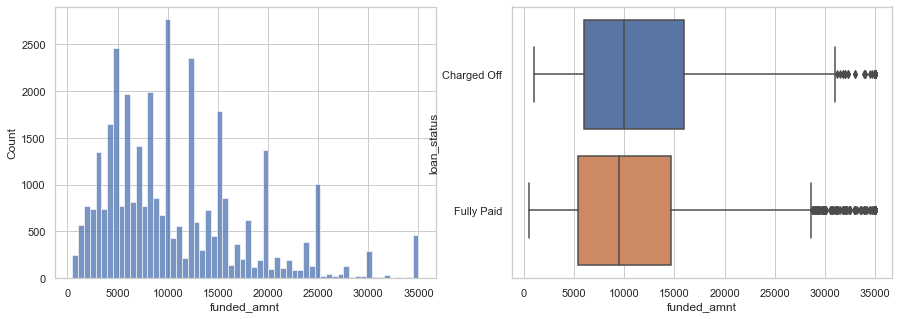

In [95]:
#plooting distribution of funded_amnt against loan_status column where default selected is Charged Off

plt.figure(figsize=(10,5))

plot_distribution(master_loan, 'funded_amnt')


In [96]:
master_loan.groupby('loan_status')['funded_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4943.0,11925.318632,7734.585755,1000.0,6000.0,10000.0,16000.0,35000.0
Fully Paid,30424.0,10694.503517,6940.442933,500.0,5400.0,9500.0,14700.0,35000.0


#### **Observation:**
* ##### As can be seen from above analysis it can be concluded that total amount committed is < 15000 (75th percentile)
* ##### Charged off loans are shifted towards total amount committed than Fully Paid loans

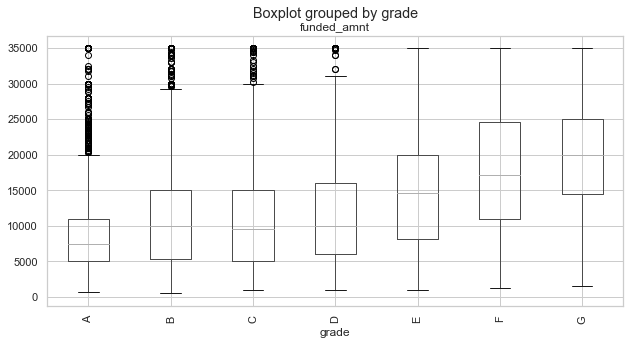

In [97]:
fig, ax = plt.subplots(figsize=(10,5))
master_loan.boxplot(column=['funded_amnt'],by='grade', ax=ax, rot=90)

In [98]:
master_loan.groupby('grade')['funded_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
grade,,,,,,,,
A,9140.0,8499.480306,5150.378857,725.0,5000.0,7500.0,11000.00,35000.0
B,10718.0,10738.451670,6793.990808,500.0,5375.0,9975.0,15000.00,35000.0
C,7181.0,10667.501044,6944.246130,1000.0,5000.0,9600.0,15000.00,35000.0
D,4663.0,11974.908857,7349.279957,1000.0,6000.0,10000.0,16000.00,35000.0
E,2481.0,15123.589279,8488.397592,1000.0,8100.0,14550.0,20000.00,35000.0
F,902.0,17638.858093,8612.074385,1200.0,11000.0,17112.5,24556.25,35000.0
G,282.0,20078.900709,8273.326660,1600.0,14525.0,20000.0,25000.00,35000.0


#### **Observation:**
* ##### As can be seen from above analysis it can be concluded that max amount committed for grades C-G are more which can constitute to more loan defaulting since from our earlier analysis we concluded that grades from C-G constitue more to Charged Off loans.

* ##### Max amount committed to all grade is 35000 which should be reduced for grade C-G as per our earlier analysis on grade contributing more to loan defaulting 

### Variable - dti
#### Data_Dictionary: A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

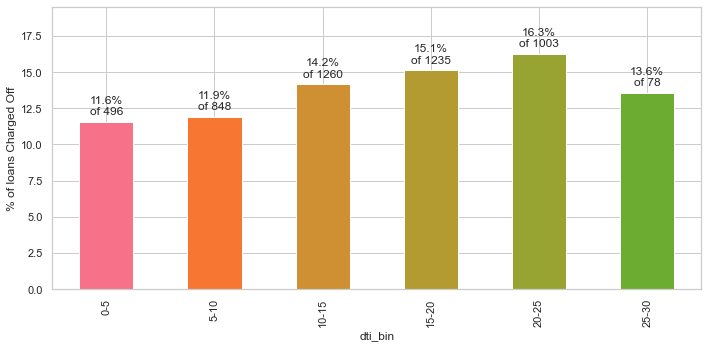

In [99]:
# Creating derived variable dti_bin

master_loan['dti_bin'] = pd.cut(master_loan['dti'], [0,5,10,15,20,25,30], labels=['0-5','5-10','10-15','15-20','20-25','25-30'])

#plotting derived column dti_bin against column loan_status (default = 'Charged Off') to check relation between the 2 columns

plt.figure(figsize=(10,5))
plotLoanStatus(master_loan,'dti_bin')

#### Observation:

* ##### Higher the debt-to-income ratio higher are the chances of loan being Charged Off


<Figure size 720x360 with 0 Axes>

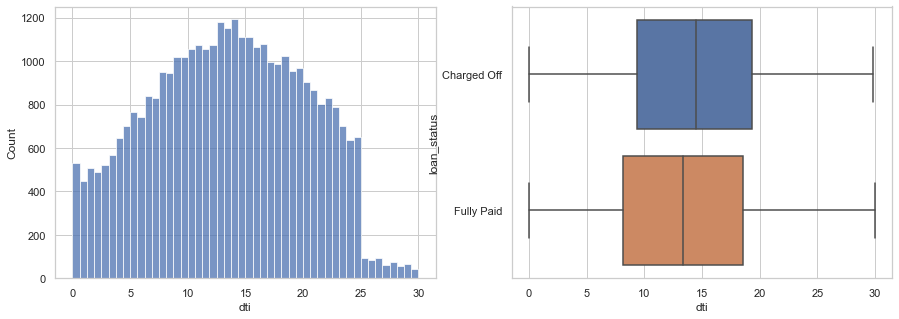

In [100]:
#plotting distribution of dti column and its boxplot against loan_status column

plt.figure(figsize=(10,5))

plot_distribution(master_loan, 'dti')

In [101]:
#Checkeing distribution of dti column and its boxplot against loan_status column

master_loan.groupby('loan_status')['dti'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4943.0,14.160908,6.522564,0.0,9.355,14.440,19.34,29.85
Fully Paid,30424.0,13.280979,6.646843,0.0,8.160,13.345,18.53,29.99


#### Observation:
* ##### When the dti or debt payment to income ratio is higher than 19, higher percentage of loans are Charged Off

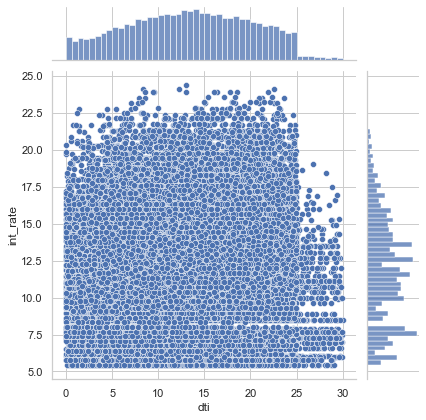

In [102]:
#Creating joint plot to see the spread of dti and int_rate columns


sns.jointplot('dti','int_rate', master_loan.loc[master_loan['int_rate']<30])
sns.set_style("whitegrid")
plt.show()

#### Observation:

* ##### As observed earlier that higher the dti higher the chances of loan being Charged Off thus, higher interest rates should be charged for higher dti since it can be observed that int_rate charged on higher dti is less. This can curtail the risk of more Charged Off loans.

### Variable - pub_rec_bankruptcies


#### Data_Dictionary: Number of public record bankruptcies


In [103]:
# Identifying unique public record bankruptcies

master_loan.pub_rec_bankruptcies.value_counts(normalize=True)

0.0    0.958464
1.0    0.041395
2.0    0.000141
Name: pub_rec_bankruptcies, dtype: float64

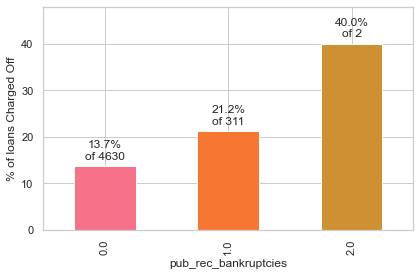

In [104]:
#plotting derived column pub_rec_bankruptcies against column loan_status (default = 'Charged Off') to check relation between the 2 columns

plt.subplot(1, 1, 1)
plotLoanStatus(master_loan, 'pub_rec_bankruptcies')
plt.show()

#### **Observation:**
* ##### The percentage of Charged Off loans is markedly higher when the borrower has a prior record of bankruptcy.
* ##### 96% have no public record bankruptcies. 4% have 1 derogatory record.
* ##### Having even 1 derogatory record increases the chances of Charge Off significantly.

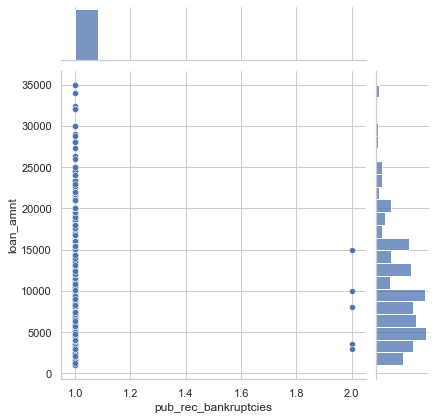

In [105]:
#Creating joint plot to see the spread of loan_amnt against pub_rec_bankruptcies column where occurence is more than 0


sns.jointplot('pub_rec_bankruptcies','loan_amnt', master_loan.loc[master_loan['pub_rec_bankruptcies']>0])
sns.set_style("whitegrid")
plt.show()

#### **Observation:**
* ##### High value loans have been extended to more than 0 prior record of bankruptcy hence the percentage of Charged Off loans is markedly higher when the borrower has a prior record of bankruptcy which was observed on previous analysis.
* ##### High value loans should not be given to applicants having >0 prior bankruptcy records

### Multivariate Analysis

In [106]:
# Multivariate analysis - creating new dataframe loan_pair to analyze multiple variables by picking few imporatnt columns from dataset separately.
# Columns selected: 'loan_amnt', 'annual_inc','int_rate','loan_status','emp_length'

loan_pair = master_loan[['loan_amnt', 'annual_inc','issue_d_year','int_rate','loan_status','emp_length']].copy()
loan_pair.head()

,loan_amnt,annual_inc,issue_d_year,int_rate,loan_status,emp_length
1,2500,30000.0,2011,15.27,Charged Off,0
3,10000,49200.0,2011,13.49,Fully Paid,10
5,5000,36000.0,2011,7.90,Fully Paid,3
6,7000,47004.0,2011,15.96,Fully Paid,8
7,3000,48000.0,2011,18.64,Fully Paid,9


### Analyzing skewness of all the above mentioned columns using boxplot 

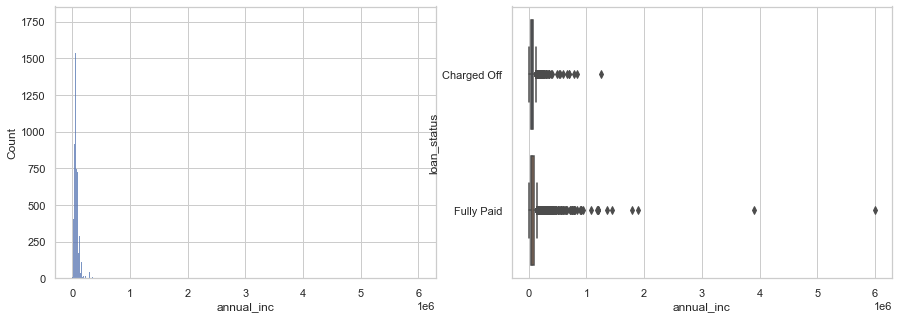

In [107]:
plot_distribution(master_loan, 'annual_inc')

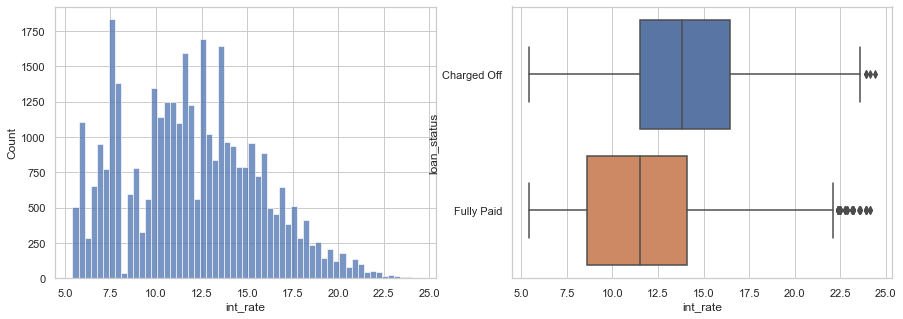

In [108]:
plot_distribution(master_loan, 'int_rate')

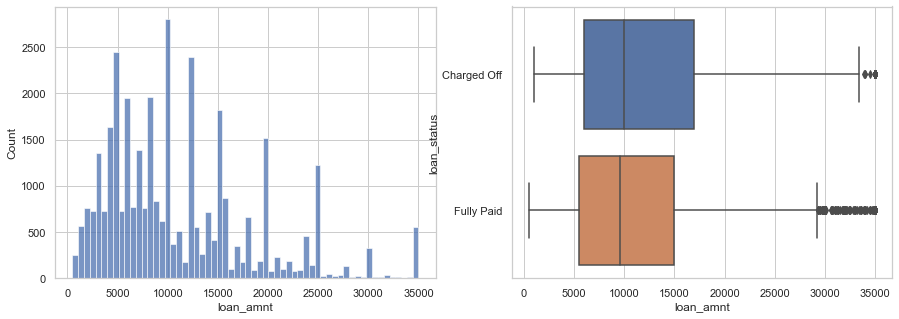

In [109]:
plot_distribution(master_loan, 'loan_amnt')

#### As can be seen from above boxplots the columns mentioned are heavily skewed hence taking the log of those variables

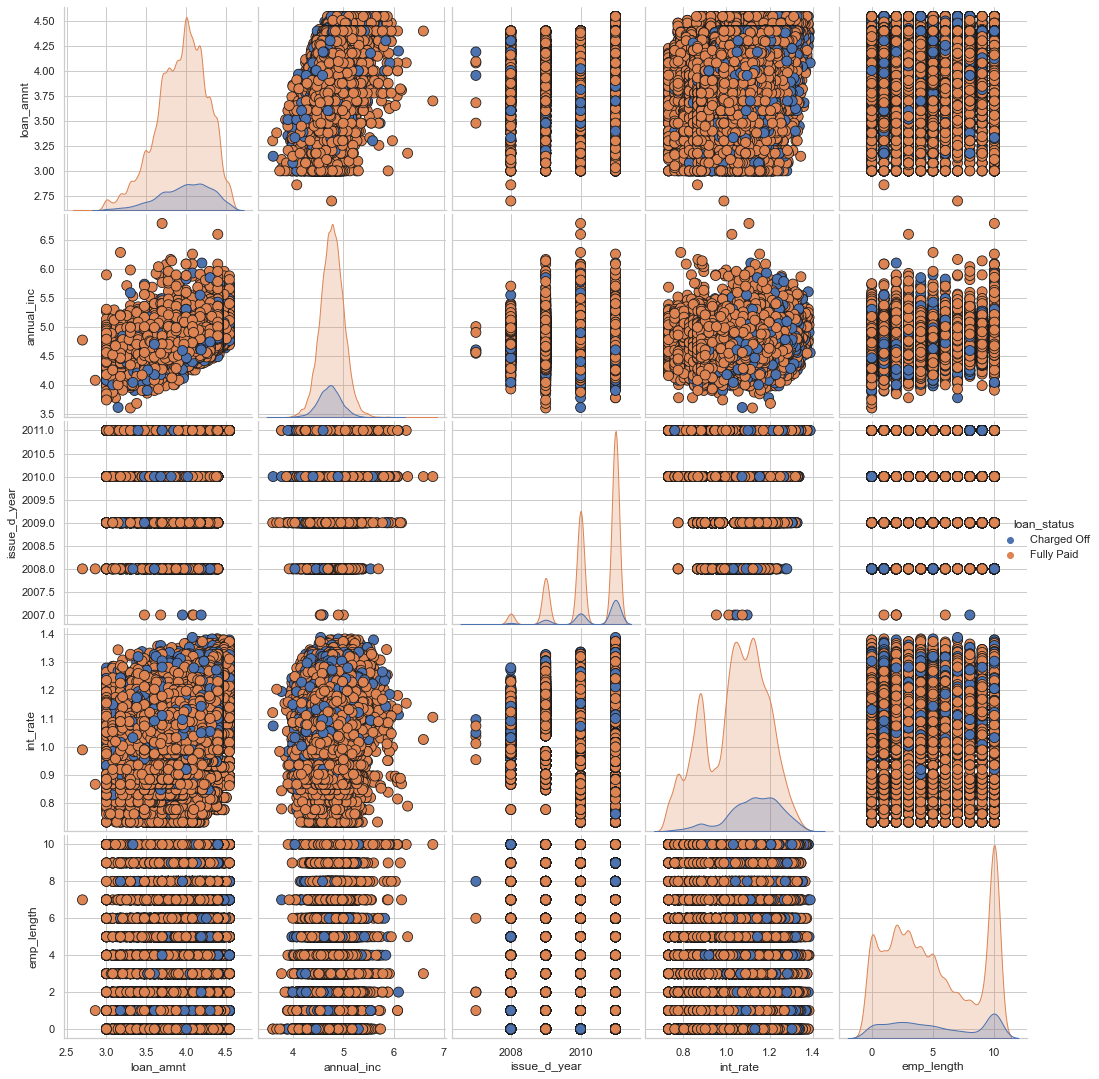

In [110]:
loan_pair['loan_amnt'] = np.log10(loan_pair['loan_amnt'])
loan_pair['annual_inc'] = np.log10(loan_pair['annual_inc'])
loan_pair['int_rate'] = np.log10(loan_pair['int_rate'])

# Creating pair plots colored by loan status with a density plot and formatting the scatter plots.

g=sns.pairplot(loan_pair, hue = 'loan_status', diag_kind = 'kde',
             plot_kws = {'alpha': 1.0, 's': 100, 'edgecolor': 'k'},
             height = 5)
g.fig.set_size_inches(15,15)
plt.show()


### Observation:


* ##### Increase in Charged Off  loans with increase in year.
* ##### Increase in employment years leads to increase in annual income
* ##### Higher the annual income higher the loan amount
* ##### Higher the interest rate higher charged off ratio
* ##### Intrest rate is increasing with loan amount increase which results in high charged off



In [118]:
master_loan["loan_status_0_1"] = master_loan.loan_status.map({"Charged Off":0, "Fully Paid":1})

In [124]:
# create bins for annual_inc range
bin = [0, 25000, 50000, 75000, 100000, 140000]
labels = ['0-25000', '25000-50000', '50000-75000', '75000-100000', '125000+']
master_loan['annual_inc_range'] = pd.cut(master_loan.annual_inc, bins=bin, labels=labels)
master_loan.annual_inc_range.value_counts()

25000-50000     11686
50000-75000     10936
75000-100000     5689
125000+          3308
0-25000          2035
Name: annual_inc_range, dtype: int64

In [125]:
loan.installment.describe()

count    36433.000000
mean       326.186394
std        207.389943
min         16.080000
25%        168.900000
50%        283.280000
75%        432.220000
max       1305.190000
Name: installment, dtype: float64

In [126]:
# create range for installment 
def installment_ranges(n):
    if n <= 250:
        return 'low'
    elif n > 250 and n <=500:
        return 'medium'
    elif n > 500 and n <=750:
        return 'high'
    else:
        return 'very high'

master_loan['installment_range'] = master_loan.installment.apply(lambda x: installment_ranges(x))

In [127]:
master_loan.dti.describe()

count    35367.000000
mean        13.403961
std          6.636540
min          0.000000
25%          8.320000
50%         13.500000
75%         18.640000
max         29.990000
Name: dti, dtype: float64

In [128]:
# create range for dti 
bins = [0, 5.0, 10.0, 15.0, 20.0, 25.0, 50.0]
labels = ['0-5 %', '5-10 %', '10-15 %', '15-20 %', '20-25 %', '25% +']
master_loan['dti_range'] = pd.cut(master_loan.dti, bins=bins, labels=labels)

In [129]:
bins = [0, 5000, 10000, 15000, 20000, 25000, 30000]
labels = ['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000-25000','25000+']
master_loan['loan_amnt_range'] = pd.cut(master_loan.loan_amnt, bins=bins, labels=labels)
master_loan.loan_amnt_range.value_counts()

5000-10000     11748
0-5000          8432
10000-15000     7200
15000-20000     4059
20000-25000     2599
25000+           661
Name: loan_amnt_range, dtype: int64

In [119]:
def bivar_Barplot(col, hue, title="No Title", figsize=(18,7)):
    plt.figure(figsize=figsize)
    sns.barplot(x=col, y='loan_status_0_1', hue=hue, data=master_loan)
    plt.title(title, fontname="Times New Roman", size=20, fontweight="bold")
    plt.show()

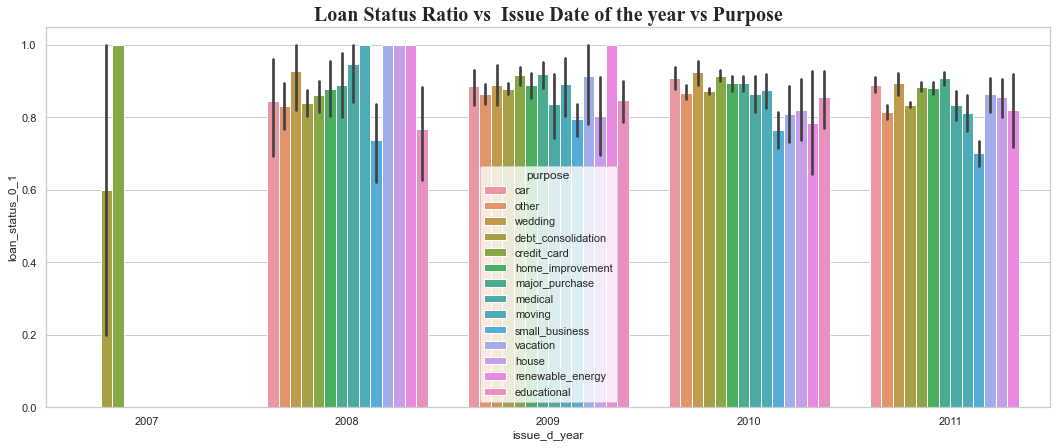

In [120]:
bivar_Barplot("issue_d_year", "purpose", "Loan Status Ratio vs  Issue Date of the year vs Purpose")

#### Here we can clearly see that in last bivarent analysis on issue_d_year stating that 
* From 2009-2011 Default percentage increased each year is more than paid percentage. 
* From 2007-2009 default percentage increased each is less than paid percentage. 
here we can clearly see that vacation, house, renewable energy, medical, moving has decreased from 2010-2011 and car loans has increased from 2010-2011

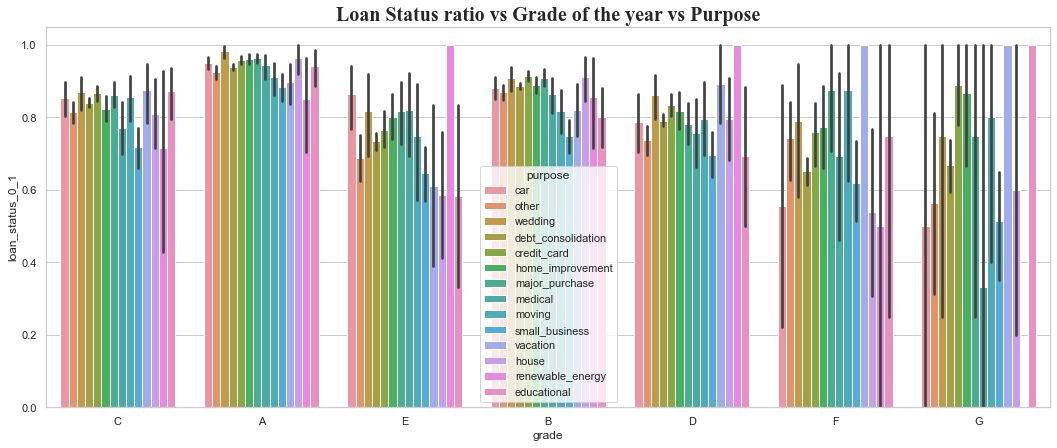

In [122]:
bivar_Barplot("grade", "purpose", "Loan Status ratio vs Grade of the year vs Purpose")

* here we can see most of the higher grade will be default as that line is on the peak on grade 6-7.

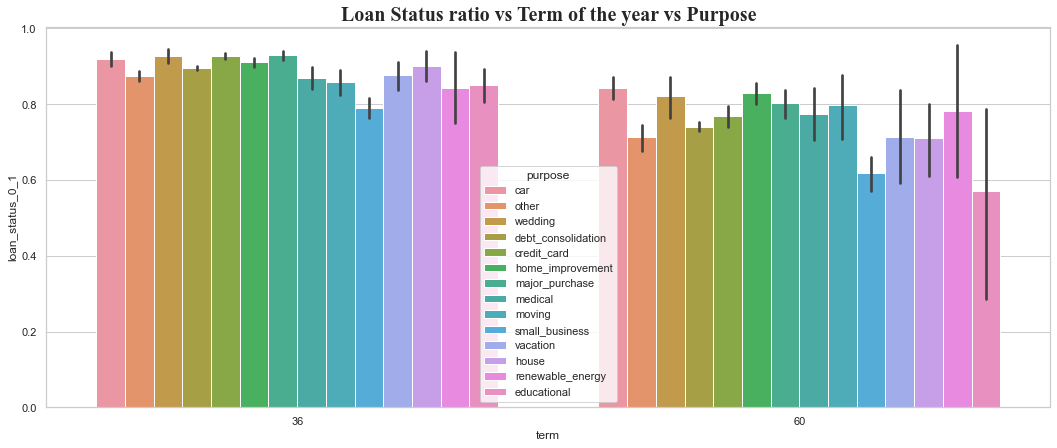

In [131]:
bivar_Barplot("term", "purpose", "Loan Status ratio vs Term of the year vs Purpose")

* In term, term 60 have more default compare to term 36. So its better to give loan to term 36 than 60

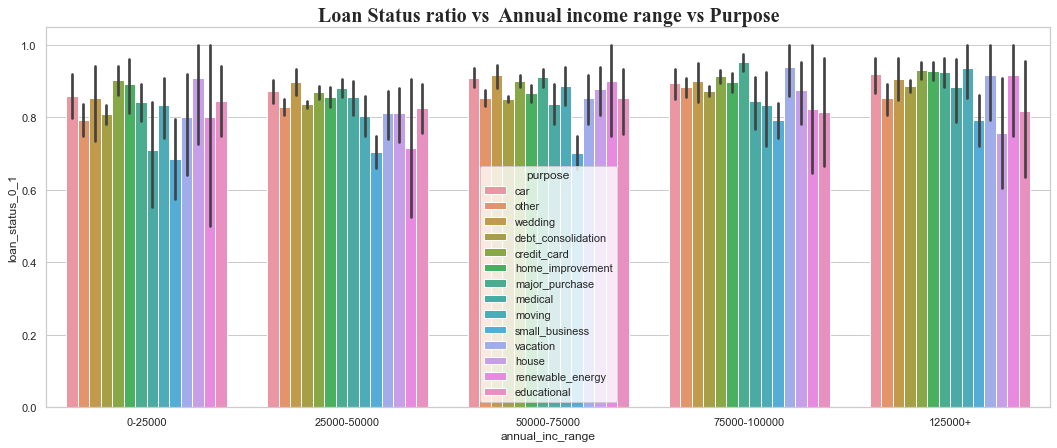

In [132]:
bivar_Barplot("annual_inc_range", "purpose", "Loan Status ratio vs  Annual income range vs Purpose")

* If the Annual income range are from 0-25k are likely to be deafault on small buisness, renewable energy and medical.
* And between 25k-50k will fail to pay small business and renewable energy.
* However, if the income range is between 50k-75k then are likey to not able to pay small buisness loan

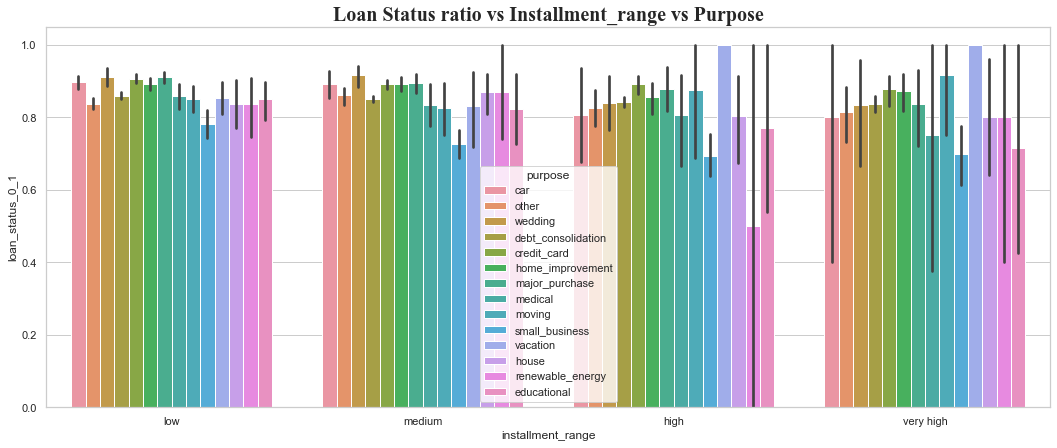

In [133]:
bivar_Barplot("installment_range", "purpose", "Loan Status ratio vs Installment_range vs Purpose")

* for Installment range high have higher chance to be default, specailly on renewable energy, education, medical, major purchases, house, and moving.
* for Installment range very high have high chance to be default on cars, education, wedding, small buisness, and major purchases.

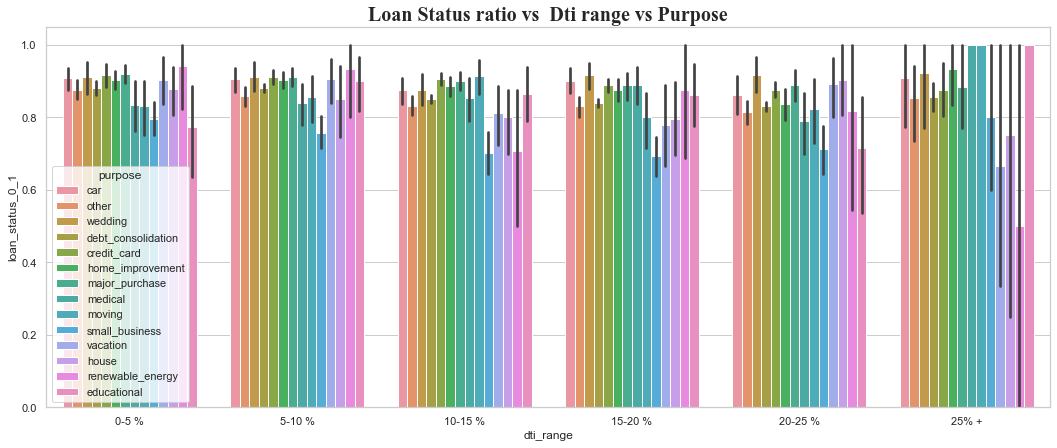

In [135]:
bivar_Barplot("dti_range", "purpose", "Loan Status ratio vs  Dti range vs Purpose")

* If the dti is above 25% then person is likely to become default, specilly on small buisness, vacation, house, renewable energy and home improvement. However they will be able to pay loan on moving, medical and education.
* On 20-25% they will be mostly not able to pay loan on education, and renewable energy.
* On 15-20% they will be default on vacation, house, education, and renewable energy.
* On 10-15% they will be default on renewable energy.

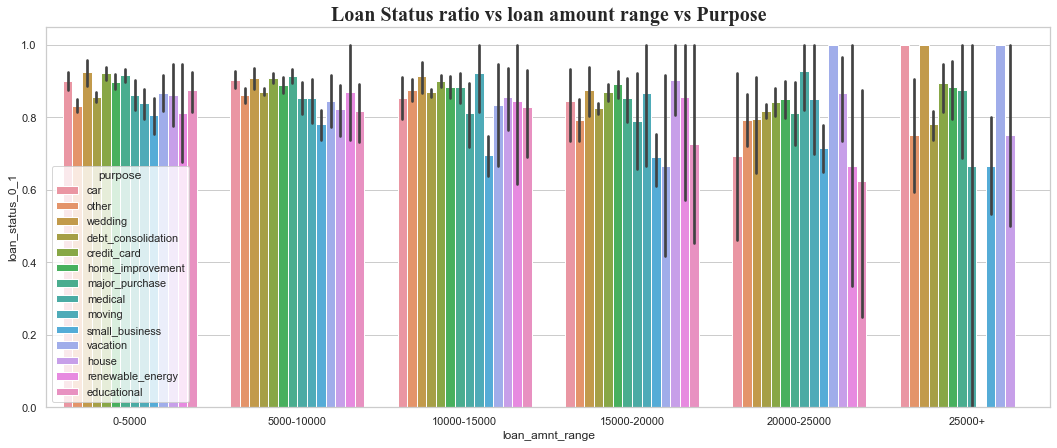

In [138]:
bivar_Barplot("loan_amnt_range", "purpose", "Loan Status ratio vs loan amount range vs Purpose")

* Here, we can say that people wo take loan between 15k to 25k+ are likey to be default.
* Specially on education, small_buisness, renewable energy, cars, and vacation.

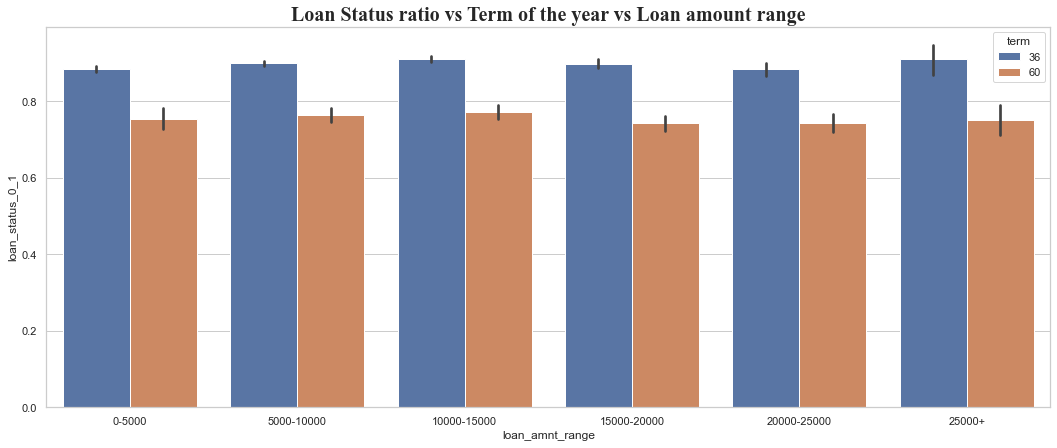

In [139]:
bivar_Barplot("loan_amnt_range", "term",  "Loan Status ratio vs Term of the year vs Loan amount range")

* We can see that loan amount range from 25k+ are most likey to be default for both 36 and 60 term.
* And also term as 60 has higher chance to be default.